In [29]:
# Initial imports
from path import Path
from pathlib import Path
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [30]:
# import CSV file into dataframe
file_path = Path("./Transcripts/GS_SentScoreswVOL.csv")
df = pd.read_csv((file_path), index_col='Date')
df.head()

,Ticker,Company,Year,QTR,Sent_Neg,Sent_Neu,Sent_Pos,Price_DayPrior,Price_DayOf,Price_DayAfter,...,PerCngNeu,PerCngPos,PRICE_PerCng_PriorEarnings,PRICE_PerCng_DayPrior,PRICE_PerCng_DayAfter,PRICE_PerCng_2DaysAfter,VOL_PerCng_PriorEarnings,VOL_PerCng_DayPrior,VOL_PerCng_DayAfter,VOL_PerCng_2DaysAfter
Date,,,,,,,,,,,,,,,,,,,,,
10/15/19,GS,Goldman Sachs,2019.0,Q3,0.018,0.845,0.136,205.82,206.46,207.42,...,-2.1%,21.4%,-4.2%,0.31%,0.46%,0.00%,56.0%,260.52%,-58.68%,-65.10%
7/16/19,GS,Goldman Sachs,2019.0,Q2,0.025,0.863,0.112,211.58,215.52,213.30,...,-0.5%,-0.9%,7.8%,1.86%,-1.03%,-0.46%,-20.2%,103.20%,-51.10%,-45.89%
4/15/19,GS,Goldman Sachs,2019.0,Q1,0.020,0.867,0.113,207.84,199.91,201.84,...,1.2%,-6.6%,1.4%,-3.82%,0.97%,4.00%,-56.4%,29.84%,-26.67%,-36.60%
1/16/19,GS,Goldman Sachs,2018.0,Q4,0.021,0.857,0.121,179.91,197.08,199.09,...,1.7%,-14.8%,-11.1%,9.54%,1.02%,2.77%,156.5%,421.81%,-46.18%,-62.81%
10/16/18,GS,Goldman Sachs,2018.0,Q3,0.016,0.843,0.142,215.22,221.70,228.28,...,0.1%,2.9%,-4.0%,3.01%,2.97%,1.47%,-36.2%,77.70%,-16.38%,-49.44%


In [31]:
#See List of column titles
for col in df.columns:
    print(col)

Ticker
Company
Year
QTR
Sent_Neg
Sent_Neu
Sent_Pos
Price_DayPrior
Price_DayOf
Price_DayAfter
Price_2DaysAfter
VOL_DayPrior
VOL_DayOf
VOL_DayAfter
VOL_2DaysAfter
PerCngNeg
PerCngNeu
PerCngPos
PRICE_PerCng_PriorEarnings
PRICE_PerCng_DayPrior
PRICE_PerCng_DayAfter
PRICE_PerCng_2DaysAfter
VOL_PerCng_PriorEarnings
VOL_PerCng_DayPrior
VOL_PerCng_DayAfter
VOL_PerCng_2DaysAfter


In [32]:
df.dropna()

,Ticker,Company,Year,QTR,Sent_Neg,Sent_Neu,Sent_Pos,Price_DayPrior,Price_DayOf,Price_DayAfter,...,PerCngNeu,PerCngPos,PRICE_PerCng_PriorEarnings,PRICE_PerCng_DayPrior,PRICE_PerCng_DayAfter,PRICE_PerCng_2DaysAfter,VOL_PerCng_PriorEarnings,VOL_PerCng_DayPrior,VOL_PerCng_DayAfter,VOL_PerCng_2DaysAfter
Date,,,,,,,,,,,,,,,,,,,,,
10/15/19,GS,Goldman Sachs,2019.0,Q3,0.018,0.845,0.136,205.82,206.46,207.42,...,-2.1%,21.4%,-4.2%,0.31%,0.46%,0.00%,56.0%,260.52%,-58.68%,-65.10%
7/16/19,GS,Goldman Sachs,2019.0,Q2,0.025,0.863,0.112,211.58,215.52,213.30,...,-0.5%,-0.9%,7.8%,1.86%,-1.03%,-0.46%,-20.2%,103.20%,-51.10%,-45.89%
4/15/19,GS,Goldman Sachs,2019.0,Q1,0.020,0.867,0.113,207.84,199.91,201.84,...,1.2%,-6.6%,1.4%,-3.82%,0.97%,4.00%,-56.4%,29.84%,-26.67%,-36.60%
1/16/19,GS,Goldman Sachs,2018.0,Q4,0.021,0.857,0.121,179.91,197.08,199.09,...,1.7%,-14.8%,-11.1%,9.54%,1.02%,2.77%,156.5%,421.81%,-46.18%,-62.81%
10/16/18,GS,Goldman Sachs,2018.0,Q3,0.016,0.843,0.142,215.22,221.70,228.28,...,0.1%,2.9%,-4.0%,3.01%,2.97%,1.47%,-36.2%,77.70%,-16.38%,-49.44%
7/17/18,GS,Goldman Sachs,2018.0,Q2,0.020,0.842,0.138,231.44,231.02,231.24,...,1.4%,-7.4%,-8.9%,-0.18%,0.10%,-0.60%,-8.4%,183.69%,-33.73%,-50.02%
4/17/18,GS,Goldman Sachs,2018.0,Q1,0.021,0.830,0.149,257.88,253.63,254.00,...,-5.5%,47.5%,0.0%,-1.65%,0.15%,0.21%,17.7%,211.12%,-55.35%,-60.63%
1/17/18,GS,Goldman Sachs,2017.0,Q4,0.020,0.878,0.101,258.46,253.65,250.97,...,2.6%,-20.5%,7.4%,-1.86%,-1.06%,0.97%,21.4%,93.64%,-42.10%,-46.06%
10/17/17,GS,Goldman Sachs,2017.0,Q3,0.017,0.856,0.127,242.41,236.09,242.03,...,1.9%,-0.8%,5.7%,-2.61%,2.52%,1.65%,10.7%,138.73%,-40.24%,-61.76%


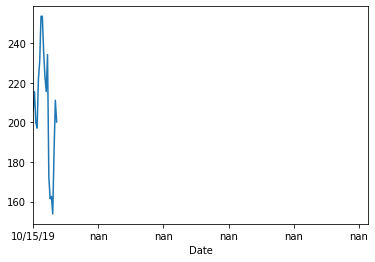

In [33]:
df.Price_DayOf.plot()